<a href="https://colab.research.google.com/github/ABIR200406/CODSOFT/blob/main/CODSOFT_TASK3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#churn_classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
data = data.drop(['RowNumber', 'Geography', ],axis=1)
data

,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
data = pd.get_dummies(data,drop_first = True)
data.head()
data = data.astype(int)
data

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,Surname_Zito,Surname_Zotov,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Gender_Male
0,15634602,619,42,2,0,1,1,1,101348,1,...,0,0,0,0,0,0,0,0,0,0
1,15647311,608,41,1,83807,1,0,1,112542,0,...,0,0,0,0,0,0,0,0,0,0
2,15619304,502,42,8,159660,3,1,0,113931,1,...,0,0,0,0,0,0,0,0,0,0
3,15701354,699,39,1,0,2,0,0,93826,0,...,0,0,0,0,0,0,0,0,0,0
4,15737888,850,43,2,125510,1,1,1,79084,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0,2,1,0,96270,0,...,0,0,0,0,0,0,0,0,0,1
9996,15569892,516,35,10,57369,1,1,1,101699,0,...,0,0,0,0,0,0,0,0,0,1
9997,15584532,709,36,7,0,1,0,1,42085,1,...,0,0,0,0,0,0,0,0,0,0
9998,15682355,772,42,3,75075,2,1,0,92888,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
data['CustomerId'].value_counts()

CustomerId
15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: count, Length: 10000, dtype: int64

<Axes: xlabel='CustomerId', ylabel='count'>

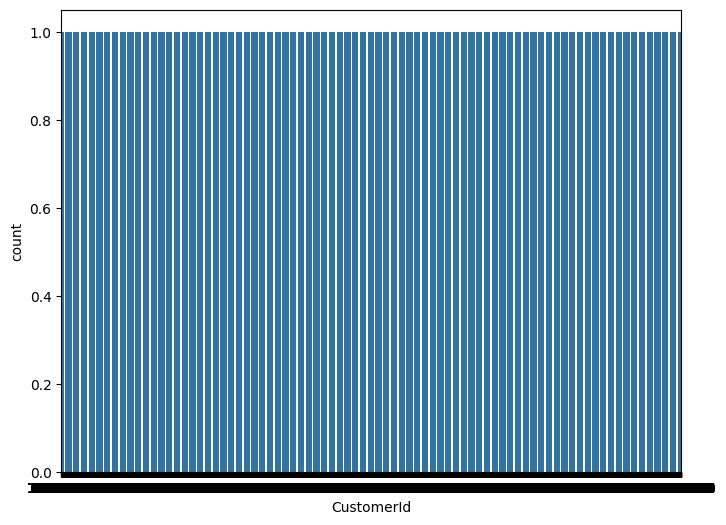

In [ ]:
plt.figure(figsize =(8,6))
sns.countplot(x='CustomerId',data = data)

In [ ]:
X = data.drop('Exited',axis=1)
y = data['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print('train  ', X_train.shape)
print('test ', X_test.shape)

train   (9000, 2941)
test  (1000, 2941)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[-0.70255369, -0.47944328,  0.19687202, ..., -0.01054151,
        -0.01490878,  0.91105005],
       [ 0.4397324 ,  1.04580863,  1.33803657, ..., -0.01054151,
        -0.01490878, -1.09763453],
       [ 1.5041205 , -0.85297437, -0.08841912, ..., -0.01054151,
        -0.01490878,  0.91105005],
       ...,
       [-1.62883346,  0.86941896, -0.08841912, ..., -0.01054151,
        -0.01490878, -1.09763453],
       [ 1.62241365,  0.16386025,  0.38706611, ..., -0.01054151,
        -0.01490878,  0.91105005],
       [ 0.21247661,  0.47513615,  1.14784248, ..., -0.01054151,
        -0.01490878,  0.91105005]])

In [ ]:
threshold = 0.05
y_train_classified = [1 if value > threshold else 0 for value in y_train]
LR = LogisticRegression()
LR.fit(X_train_scaled, y_train_classified)

LogisticRegression()

In [ ]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy1 = LR.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy1)

Model Accuracy: 0.772


In [ ]:
threshold = 0.05
y_train_classified = [1 if value > threshold else 0 for value in y_train]
randf = RandomForestClassifier()
randf.fit(X_train_scaled, y_train_classified)

In [ ]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy2 = randf.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy2)

Model Accuracy: 0.865


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
threshold = 0.05
y_train_classified = [1 if value > threshold else 0 for value in y_train]
GBC = GradientBoostingClassifier()
GBC.fit(X_train_scaled, y_train_classified)

GradientBoostingClassifier()

In [ ]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy3 = GBC.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy3)

Model Accuracy: 0.868


In [ ]:
performance_summary = pd.DataFrame({
    'Model':['LR','randf','GBC'],
    'ACC':[accuracy1,
           accuracy2,
           accuracy3,
          ]
})
performance_summary

,Model,ACC
0,LR,0.772
1,randf,0.865
2,GBC,0.868


from matplotlib import pyplot as plt
performance_summary['ACC'].plot(kind='hist', bins=20, title='ACC')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
performance_summary.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['ACC']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'ACC'}, axis=1)
              .sort_values('ACC', ascending=True))
  xs = counted['ACC']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = performance_summary.sort_values('ACC', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ACC')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
performance_summary['ACC'].plot(kind='line', figsize=(8, 4), title='ACC')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(performance_summary['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(performance_summary, x='ACC', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)